<h1><center>First Turn Cast Data Analaysis</center></h1>
<h2><center>It's like if book club had more numbers</center></h2>

This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [18]:
## import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
# import seaborn as sns

# This adjusted the frame size of display created by pandas in order to 
# utilize the entire width of the jupyter notebook within VSCode.
pd.set_option('display.expand_frame_repr', False)

In [3]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
user_data.info()
list(user_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 165 entries, id to work_place_dice
dtypes: float64(31), int64(119), object(15)
memory usage: 174.1+ KB


['id',
 'game',
 'season',
 'play_length',
 'box_length',
 'time_delta',
 'complexity',
 'rating',
 'rank',
 'live',
 'start_player',
 'winner',
 'bp_score',
 'bp_score_normal',
 'bp_score_adjusted',
 'bp_pickup',
 'bp_play_again',
 'eric_score',
 'eric_score_normal',
 'eric_score_adjusted',
 'eric_pickup',
 'eric_play_again',
 'kiwi_score',
 'kiwi_score_normal',
 'kiwi_score_adjusted',
 'kiwi_pickup',
 'kiwi_play_again',
 'kait_score',
 'kait_score_normal',
 'kait_score_adjusted',
 'kait_pickup',
 'kait_play_again',
 'paxton_score',
 'paxton_score_normal',
 'paxton_score_adjusted',
 'paxton_pickup',
 'paxton_play_again',
 'min_normal',
 'average_normal',
 'max_normal',
 'normal_spread',
 'all_played',
 'bgg_mean',
 'bgg_std_dev',
 'bgg_min',
 'bgg_max',
 'bgg_1stq',
 'bgg_3rdq',
 'bgg_median',
 'total_mechanics',
 'advantage_token',
 'area_majority_influence',
 'area_movement',
 'action_drafting',
 'action_event',
 'action_points',
 'action_retrieval',
 'action_queue',
 'asym_info',
 

The RangeIndex above is the number of games in the database. The column index is for each of the datapoints in game. Most of the columns are integers, these are primarily the columns pertaining to mechanics. As <code>1</code> indicates that the mechanic is present in the game and a <code>0</code> indicates it is not present. The columns of float type are those pertaining to actual statistics. The object columns are primarily game winner, game start, if the players would pick it up, if they would play it again etcetera.

In [4]:
user_data.describe(include='all')

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_role,turn_stat_based,turn_to_pass,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice
count,135.000000,135,135.000000,131.000000,135.000000,135.000000,135.000000,134.000000,134.000000,135,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7 Wonders Duel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.044444,NaN,2.088889,70.549618,52.844444,15.614815,2.217644,7.391045,1409.955224,NaN,...,0.014815,0.022222,0.022222,0.022222,0.222222,0.037037,0.044444,0.014815,0.088889,0.014815
std,39.189525,NaN,0.796135,43.858376,29.880575,29.671079,0.671253,0.787636,2470.158742,NaN,...,0.121261,0.147955,0.147955,0.147955,0.417288,0.189556,0.206848,0.121261,0.285643,0.121261
min,1.000000,NaN,1.000000,15.000000,12.000000,-75.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.500000,NaN,1.000000,40.000000,30.000000,0.000000,1.821000,7.200000,250.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,NaN,2.000000,60.000000,45.000000,10.000000,2.150000,7.400000,487.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.500000,NaN,3.000000,90.000000,60.000000,30.000000,2.525000,7.700000,1105.750000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


It looks as though we need to change the mechanic columsn to binomial type, there shouldn't be much that the quartiles can provide. The mean can at least provide a precentage of games with a particular mechanic.

In [5]:
user_data.head()

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_role,turn_stat_based,turn_to_pass,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice
0,1,7 Wonders Duel,1,60.0,30,30,2.22,8.1,17.0,No,...,0,0,0,0,0,0,0,0,0,0
1,2,Altiplano,1,150.0,90,60,3.31,7.6,277.0,No,...,0,0,0,0,1,0,0,0,0,0
2,3,Arboretum,1,40.0,30,10,2.15,7.4,252.0,No,...,0,0,0,0,0,0,0,0,0,0
3,4,Biblios,1,40.0,30,10,1.68,7.2,324.0,No,...,0,0,0,0,0,0,0,0,0,0
4,5,Call to Adventure,1,75.0,45,30,2.00,7.4,1114.0,Yes,...,0,0,0,0,0,0,0,0,0,0


It appears that some of the columns that are showing as floats (play_length and rank for example) should actually be ints.

Next, we're going to break each season apart so that can be compared. We'll remove games where all three cohosts were note present, and that they have been played (there is prerecorded information in the database prior to gameplay for ease of data entry later). Following that there is some inditial data exploration.

In [6]:
season_one = user_data[(user_data['season'] == 1) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_two = user_data[(user_data['season'] == 2) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_three = user_data[(user_data['season'] == 3) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]

In [7]:
print(f'There were {len(user_data[user_data["season"] == 3]) - 1} games played this season.')
print(f'There were {len(season_three["game"]) - 1} games played by all the hosts.')

There were 48 games played this season.
There were 24 games played by all the hosts.


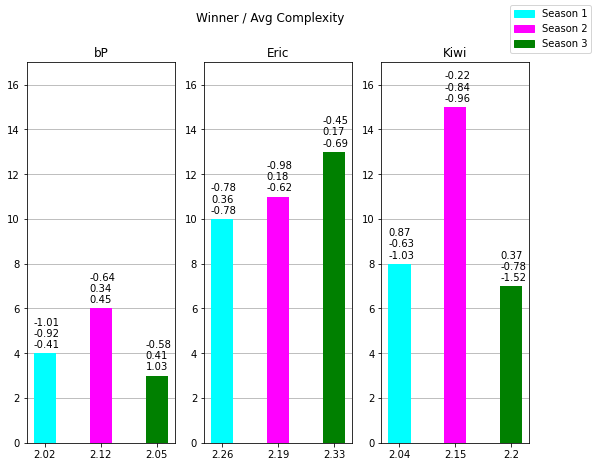

In [8]:
def build_player_wins(fig, pos, player):
  season_wins = [
    season_one[season_one['winner'] == player].count()[0],
    season_two[season_two['winner'] == player].count()[0],
    season_three[season_three['winner'] == player].count()[0]
  ]
  season_complexity = [
    str(round(np.median(season_one[season_one['winner'] == player]['complexity']), 2)),
    str(round(np.median(season_two[season_two['winner'] == player]['complexity']), 2)),
    str(round(np.median(season_three[season_three['winner'] == player]['complexity']), 2))
  ]
  play_fig = fig.add_subplot(pos)
  play_fig.bar(season_complexity, season_wins, width=0.4, color=['cyan', 'magenta', 'green'], zorder=3)
  play_fig.set_ylim(0,17)
  play_fig.set_title(f'{player}')
  play_fig.text(-0.2, season_wins[0] + 0.25, round(np.median(season_one[season_one['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(-0.2, season_wins[0] + 0.75, round(np.median(season_one[season_one['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(-0.2, season_wins[0] + 1.25, round(np.median(season_one[season_one['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.25, round(np.median(season_two[season_two['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.75, round(np.median(season_two[season_two['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 1.25, round(np.median(season_two[season_two['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.25, round(np.median(season_three[season_three['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.75, round(np.median(season_three[season_three['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 1.25, round(np.median(season_three[season_three['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.grid(True, axis='y', zorder=0)

wins_and_complexity = plt.figure(figsize=(9,7))
wins_and_complexity.suptitle("Winner / Avg Complexity")
legend_cyan = mpatches.Patch(color='cyan', label='Season 1')
legend_magenta = mpatches.Patch(color='magenta', label='Season 2')
legend_green = mpatches.Patch(color='green', label='Season 3')
wins_and_complexity.legend(handles=[legend_cyan, legend_magenta, legend_green])
build_player_wins(wins_and_complexity, 131, 'bP')
build_player_wins(wins_and_complexity, 132, 'Eric')
build_player_wins(wins_and_complexity, 133, 'Kiwi')


There were two significant changes to the database this year over the last two years. The first was how each game mechanic was recorded in the database in order to make data analysis easier. The second was the standardization score. Previously, The score was an interpolation between 0 and 10 as compared to 50 scores recorded by other users on BGG. This year, it was standardized in order to bring scores to the mean. So the above table: Each bar represents the number of wins in a season. The number below represents the mean complexity of the games won. The numbers above each bar are the means of the standarized scores for each player based on who won the game, all columns the score goes bp, eric, kiwi. The standardized number goes from -1 to 1 with 0 representing the mean of BGG scores. The closer to 0, the closer to average. More positive means higher above average and vice versa for a negative number.

Eric has steadily improved on his win rate and generally wins the more complex games. Season 2 appears to be an outlier for Kiwi as he had a significant drop in his wins and is even below his season 1 tally.

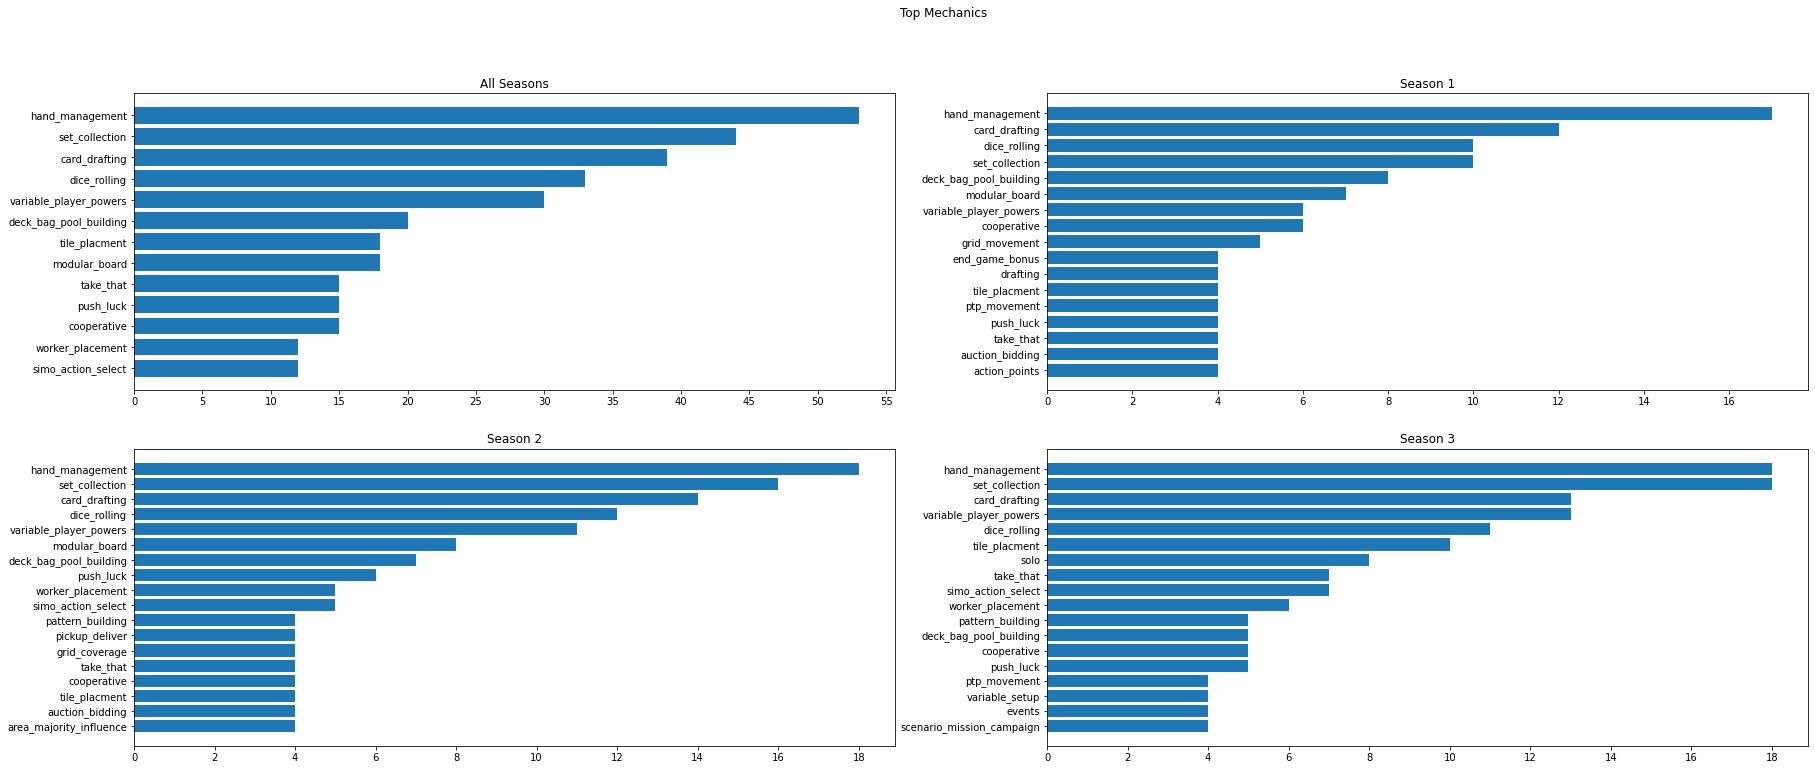

In [9]:
def build_mech_chart(fig, pos, season='all'):
  mech_fig = fig.add_subplot(pos)
  if season == 'all':
    total_mechs = user_data.loc[:, 'advantage_token':'work_place_dice'].sum()
    filter_mechs = total_mechs.where(total_mechs >= (user_data['season'].max() * 4))
    sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
    mech_fig.set_title('All Seasons')
    mech_fig.xaxis.set_major_locator(ticker.MultipleLocator(5))
  else:
    total_mechs = user_data[user_data['season'] == season].loc[:, 'advantage_token':'work_place_dice'].sum()
    filter_mechs = total_mechs.where(total_mechs >= 4)
    sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
    mech_fig.set_title(f'Season {season}')
    mech_fig.xaxis.set_major_locator(ticker.MultipleLocator(2))
  mech_fig.barh(sorted_mechs.keys(), sorted_mechs)
  return None

top_mechanics = plt.figure(figsize=(30,12))
top_mechanics.suptitle("Top Mechanics")
build_mech_chart(top_mechanics, 221)
build_mech_chart(top_mechanics, 222, 1)
build_mech_chart(top_mechanics, 223, 2)
build_mech_chart(top_mechanics, 224, 3)


This shows the top mechanics for games that we've played. It's broken out by each season, and then a similiar graph to represents the total. Predominately, Hand Management is the big one. This makes sense as pretty much any game with cards is going to have hand management listed but it's rarely if ever the primary mechanic. We've steadily increased games that contain set collection while decreasing games deck/bag/pool building, probably to bP's enjoyment.

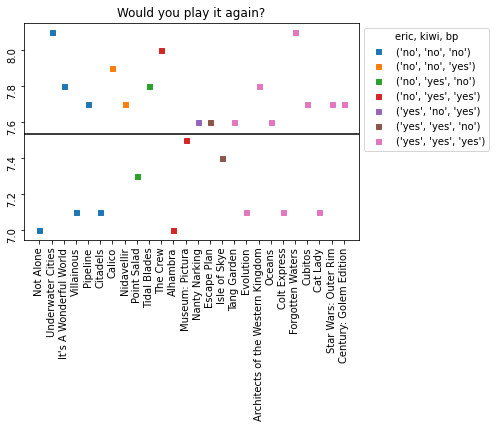

<Figure size 432x288 with 0 Axes>

In [10]:
season_three = user_data[(user_data['season'] == 3) & (user_data['all_played'] == 'yes')]
groups = season_three.groupby(by=['eric_play_again', 'kiwi_play_again', 'bp_play_again'])
for name, group in groups:
  plt.plot(group['game'], group['rating'], marker='s', linestyle='', markersize=5, label=name)
plt.axhline(season_three['rating'].mean(), -1, len(season_three['game']), color='black')
plt.tick_params(rotation=90)
plt.legend(title='eric, kiwi, bp', bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Would you play it again?')
plt.show()
plt.clf()

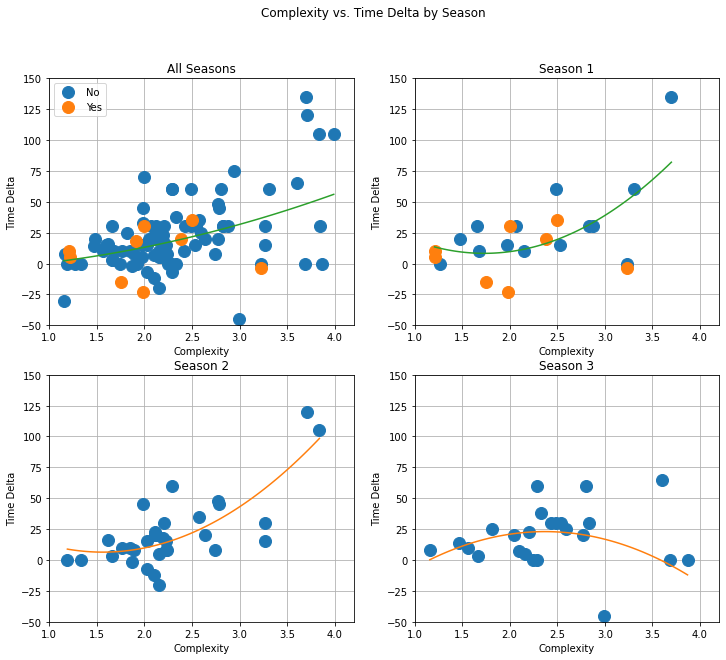

In [11]:
def build_delta_complexity(fig, pos, season='all'):
  complex_plot = fig.add_subplot(pos)
  if season == 'all':
    all_data = user_data[(user_data['all_played'] == 'yes') & (user_data['time_delta'].notnull())]
    pfit = np.polynomial.polynomial.Polynomial.fit(all_data['complexity'], all_data['time_delta'], 2)
    groups = all_data.groupby('live')
    for name, group in groups:
      complex_plot.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
    complex_plot.plot(*pfit.linspace())
    complex_plot.legend()
    complex_plot.set_title('All Seasons')
  else:
    season_data = user_data[(user_data['season'] == season) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
    pfit = np.polynomial.polynomial.Polynomial.fit(season_data['complexity'], season_data['time_delta'], 2)
    groups = season_data.groupby('live')
    for name, group in groups:
      complex_plot.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
    complex_plot.plot(*pfit.linspace())
    complex_plot.set_title(f'Season {season}')
  complex_plot.set_ylabel('Time Delta')
  complex_plot.set_xlabel('Complexity')
  complex_plot.set_ylim(-50,150)
  complex_plot.set_xlim(1,4.2)
  complex_plot.grid()

delt_comp_figure = plt.figure(figsize=(12,10))
delt_comp_figure.suptitle("Complexity vs. Time Delta by Season")
build_delta_complexity(delt_comp_figure, 221)
build_delta_complexity(delt_comp_figure, 222, 1)
build_delta_complexity(delt_comp_figure, 223, 2)
build_delta_complexity(delt_comp_figure, 224, 3)


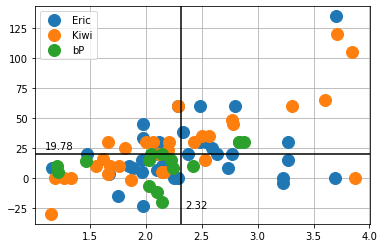

In [12]:
all_data = user_data[(user_data['all_played'] == 'yes') & (user_data['time_delta'].notnull())]
complex_mean = all_data['complexity'].mean()
time_delta_mean = all_data['time_delta'].mean()
groups = all_data.groupby('winner')
for name, group in groups:
  plt.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
plt.axhline(time_delta_mean, color='black')
plt.text(1.1, time_delta_mean + 4, round(time_delta_mean, 2))
plt.axvline(complex_mean, color='black')
plt.text(complex_mean + 0.035, -25, round(complex_mean, 2))
plt.legend()
plt.grid()
plt.show()


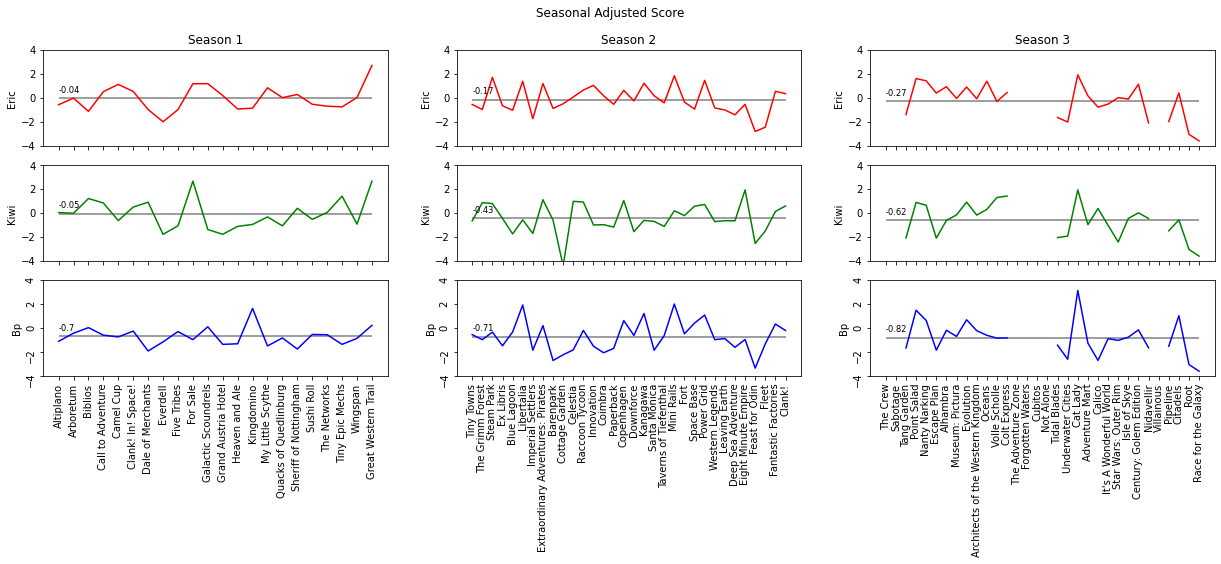

In [13]:
def build_adj_score(fig, pos, player, season, xlab=False):
  if player == 'eric':
    playColor = 'red'
  elif player == 'kiwi':
    playColor = 'green'
  elif player == 'bp':
    playColor = 'blue'
  else:
    playColor = 'black'
  play_fig = fig.add_subplot(pos)
  play_fig.plot(season['game'], season[f'{player}_score_adjusted'], color=playColor)
  play_fig.hlines(np.mean(season[f'{player}_score_adjusted']), 0, len(season['game'])-1, color ='grey')
  play_fig.text(0,np.mean(season[f'{player}_score_adjusted']) + 0.5,round(np.mean(season[f'{player}_score_adjusted']), 2),fontsize='small')
  if not xlab:
    play_fig.xaxis.set_ticklabels([])
  else:
    play_fig.tick_params(rotation=90)
  play_fig.set_ylim(-4,4)
  play_fig.set_ylabel(f'{player.capitalize()}')

season_one_adjusted_figure = plt.figure(figsize=(21,6))
season_one_adjusted_figure.suptitle("Seasonal Adjusted Score")
build_adj_score(season_one_adjusted_figure, 331, 'eric', season_one)
season_one_adjusted_figure.axes[0].set_title('Season 1')
build_adj_score(season_one_adjusted_figure, 332, 'eric', season_two)
season_one_adjusted_figure.axes[1].set_title('Season 2')
build_adj_score(season_one_adjusted_figure, 333, 'eric', season_three)
season_one_adjusted_figure.axes[2].set_title('Season 3')
build_adj_score(season_one_adjusted_figure, 334, 'kiwi', season_one)
build_adj_score(season_one_adjusted_figure, 335, 'kiwi', season_two)
build_adj_score(season_one_adjusted_figure, 336, 'kiwi', season_three)
build_adj_score(season_one_adjusted_figure, 337, 'bp', season_one, True)
build_adj_score(season_one_adjusted_figure, 338, 'bp', season_two, True)
build_adj_score(season_one_adjusted_figure, 339, 'bp', season_three, True)

plt.show()

Does theme impact score?
Does thinking we want to play it impact score?
How often are we right or wrong about what we'll like?


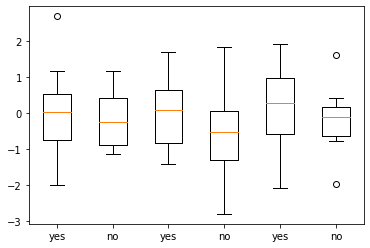

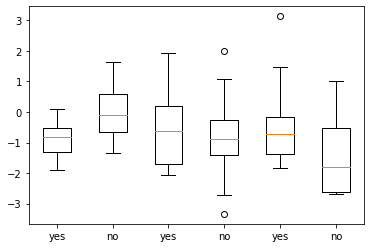

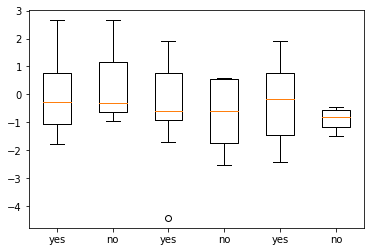

In [14]:
data = [] 
data.append(season_one[(season_one['eric_pickup']=='yes') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_one[(season_one['eric_pickup']=='no') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_pickup']=='yes') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_pickup']=='no') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_pickup']=='yes') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_pickup']=='no') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['bp_pickup']=='yes') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_one[(season_one['bp_pickup']=='no') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_pickup']=='yes') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_pickup']=='no') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_pickup']=='yes') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_pickup']=='no') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['kiwi_pickup']=='yes') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_one[(season_one['kiwi_pickup']=='no') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_pickup']=='yes') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_pickup']=='no') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_pickup']=='yes') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_pickup']=='no') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()

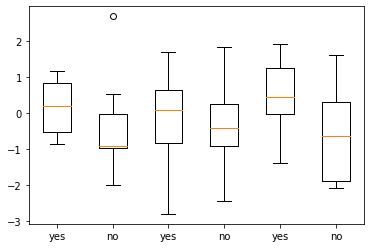

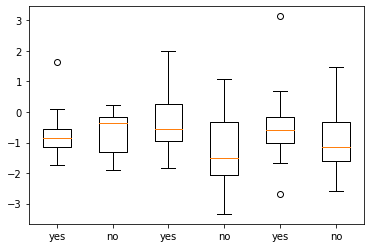

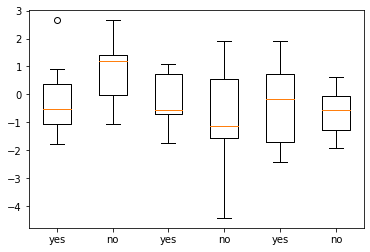

In [15]:
data = [] 
data.append(season_one[(season_one['eric_play_again']=='yes') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_one[(season_one['eric_play_again']=='no') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_play_again']=='yes') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_play_again']=='no') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_play_again']=='yes') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_play_again']=='no') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['bp_play_again']=='yes') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_one[(season_one['bp_play_again']=='no') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_play_again']=='yes') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_play_again']=='no') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_play_again']=='yes') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_play_again']=='no') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['kiwi_play_again']=='yes') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_one[(season_one['kiwi_play_again']=='no') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_play_again']=='yes') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_play_again']=='no') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_play_again']=='yes') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_play_again']=='no') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()

In [16]:
print(f"In season 1, eric would play {round(len(season_one[season_one['eric_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 he would play {round(len(season_two[season_two['eric_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. Finally, in season 3 he would play {round(len(season_three[season_three['eric_play_again']=='yes']) / len(season_three['game']), 2)*100}% again.")
print(f"In season 1, bp would play {round(len(season_one[season_one['bp_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 she would play {round(len(season_two[season_two['bp_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. Finally, in season 3 she would play {round(len(season_three[season_three['bp_play_again']=='yes']) / len(season_three['game']), 2)*100}% again.")
print(f"In season 1, kiwi would play {round(len(season_one[season_one['kiwi_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 he would play {round(len(season_two[season_two['kiwi_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. Finally, in season 3 he would play {round(len(season_three[season_three['kiwi_play_again']=='yes']) / len(season_three['game']), 2)*100}% again.")

In season 1, eric would play 59.0% again. In season 2 he would play 53.0% again. Finally, in season 3 he would play 41.0% again.
In season 1, bp would play 64.0% again. In season 2 she would play 59.0% again. Finally, in season 3 she would play 50.0% again.
In season 1, kiwi would play 77.0% again. In season 2 he would play 72.0% again. Finally, in season 3 he would play 53.0% again.


In [17]:

eric_right_wrong_three = season_three[season_three['eric_pickup'] == season_three['eric_play_again']]
print(season_three['eric_play_again'].value_counts())
print(eric_right_wrong_three['eric_play_again'].value_counts())
print(eric_right_wrong_three['game'].count() / len(season_three))
print(eric_right_wrong_three[['game', 'eric_pickup', 'eric_play_again']])


no     13
yes    13
Name: eric_play_again, dtype: int64
yes    12
no      9
Name: eric_play_again, dtype: int64
0.65625
                                  game eric_pickup eric_play_again
87                            The Crew          no              no
90                         Tang Garden         yes             yes
91                         Point Salad          no              no
92                       Nanty Narking         yes             yes
93                         Escape Plan         yes             yes
96                     Museum: Pictura          no              no
97                           Evolution         yes             yes
99   Architects of the Western Kingdom         yes             yes
100                             Oceans         yes             yes
103                       Colt Express         yes             yes
106                   Forgotten Waters         yes             yes
107                            Cubitos         yes             yes
109      